# Geometric Brownian stock model

Written by Tran Khanh Nguyen.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as scp
import datetime
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
from sklearn.linear_model import LinearRegression
from matplotlib.gridspec import GridSpec
from matplotlib.dates import date2num, DateFormatter, HourLocator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_1min=pd.read_excel('/data_LLY_1min.xlsx')
data_daily=pd.read_excel('/data_LLY_daily.xlsx')
df_lilly_emo=pd.read_csv('/lilly_emo.csv')
df_lilly_emo['date']=pd.to_datetime(df_lilly_emo['date'])
df_lilly_emo.set_index('date',inplace=True)

In [ ]:
df_lilly_emo.columns

Index(['text', 's', 'v', 'a', 'd', 'MA volatility'], dtype='object')

In [ ]:
data_1min['timestamp_UTC']=pd.to_datetime(data_1min['timestamp'])+pd.to_timedelta('04:00:00')

In [ ]:
import pickle

with open('/lilly.pkl','rb') as file:
    df_lilly = pickle.load(file)

len(df_lilly)

104

In [ ]:
idx=(df_lilly.index<=pd.to_datetime('2022-11-14'))&(df_lilly.index>=pd.to_datetime('2022-11-10'));
df_lilly=df_lilly[idx];
len(df_lilly)

60

In [ ]:
idx=(df_lilly_emo['date']<=pd.to_datetime('2022-11-14'))&(df_lilly_emo['date']>=pd.to_datetime('2022-11-10'));
df_lilly_emo=df_lilly_emo[idx];
len(df_lilly_emo)

60

In [ ]:
index=(data_1min['timestamp_UTC']<=pd.to_datetime('2022-11-14'))&(data_1min['timestamp_UTC']>=pd.to_datetime('2022-11-10'))
data_1min_filter=data_1min.loc[index]
data_1min_filter.reset_index(inplace=True)
len(data_1min_filter)

778

In [ ]:
w=pd.to_timedelta('0 days 09:00:00')
for k in df_lilly_emo.index:
  idx=(data_1min['timestamp_UTC']>(k-w))&(data_1min['timestamp_UTC']<(k+w));
  df_lilly_emo.loc[k,'MA volatility']=np.mean(data_1min.loc[idx,'volatility']);

In [ ]:
data_1min['timestamp']=pd.to_datetime(data_1min['timestamp'])
data_1min['return']=np.log(data['close']/data['open'])
data_daily['timestamp']=pd.to_datetime(data_daily['timestamp'])


In [ ]:
window=pd.to_timedelta('0 days 00:30:00')
for k in range(len(data_1min['timestamp'])):
  idx=(data_1min['timestamp']>(data_1min.loc[k,'timestamp']-window))&(data_1min['timestamp']<(data_1min.loc[k,'timestamp']+window));
  data_1min.loc[k,'volatility']=np.std(data_1min.loc[idx,'return']);

In [ ]:
window1=pd.to_timedelta('0 days 00:00:00')
window2=pd.to_timedelta('0 days 12:00:00')
w=pd.to_timedelta('0 days 09:00:00')
for k in range(len(data_1min_filter['timestamp_UTC'])):
  idx=(df_lilly.index>=data_1min_filter.loc[k,'timestamp_UTC']+window1)&(df_lilly.index<=data_1min_filter.loc[k,'timestamp_UTC']+window2)
  data_1min_filter.loc[k,'MA_sent_score']=np.mean(df_lilly.loc[idx,'BERT sentiment score']);
  idx=(df_lilly_emo.index>=data_1min_filter.loc[k,'timestamp_UTC']-w)&(df_lilly_emo.index>=data_1min_filter.loc[k,'timestamp_UTC']+w)
  data_1min_filter.loc[k,'MA v']=np.mean(df_lilly_emo.loc[idx,'v']);
data_1min_filter.head()

<ipython-input-7-38ac83be65b2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1min_filter.loc[k,'MA_sent_score']=np.mean(df_lilly.loc[idx,'BERT sentiment score']);
<ipython-input-7-38ac83be65b2>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1min_filter.loc[k,'MA v']=np.mean(df_lilly_emo.loc[idx,'v']);


,index,Unnamed: 0,timestamp,open,high,low,close,volume,return,volatility,timestamp_UTC,MA_sent_score,MA v
0,2726,2726,2022-11-10 09:32:00,363.341,365.120,362.074,362.938,40241,-0.001110,0.002259,2022-11-10 13:32:00,0.048509,0.13323
1,2727,2727,2022-11-10 09:33:00,362.386,363.052,361.517,361.770,3725,-0.001701,0.002205,2022-11-10 13:33:00,0.048509,0.13323
2,2728,2728,2022-11-10 09:34:00,361.891,362.250,361.211,361.543,5515,-0.000962,0.002154,2022-11-10 13:34:00,0.048509,0.13323
3,2729,2729,2022-11-10 09:35:00,361.906,362.052,360.122,360.900,15628,-0.002784,0.002110,2022-11-10 13:35:00,0.048509,0.13323
4,2730,2730,2022-11-10 09:36:00,360.550,361.152,360.318,361.097,1797,0.001516,0.002067,2022-11-10 13:36:00,0.048509,0.13323


In [ ]:
window=pd.to_timedelta('0 days 06:00:00')
for k in df_lilly.index:
  idx=(data_1min['timestamp_UTC']>(k-window))&(data_1min['timestamp_UTC']<(k));
  df_lilly.loc[k,'MA_return']=np.mean(data_1min.loc[idx,'return']);



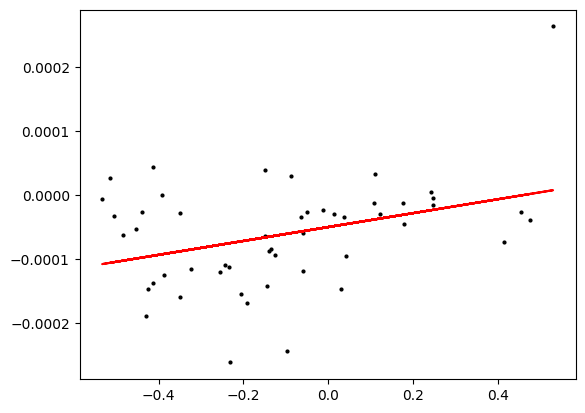

In [ ]:
X=np.array(df_lilly.dropna()['BERT sentiment score']).reshape(-1,1);
y=np.array(df_lilly.dropna()['MA_return']).reshape(-1,1)
reg=LinearRegression()
reg.fit(X,y)
reg.score(X,y)
plt.plot(df_lilly['BERT sentiment score'],df_lilly['MA_return'],'ko',markersize=2);
plt.plot(X,reg.predict(X),'r-');


In [ ]:
X_pred=np.array(data_1min_filter.dropna()['MA_sent_score']).reshape(-1,1);
y_pred=reg.predict(X_pred);
df_predict=data_1min_filter.dropna()[['timestamp_UTC','MA_sent_score']].copy()
df_predict['predicted return']=y_pred;
df_predict.head()

,timestamp_UTC,MA_sent_score,predicted return
0,2022-11-10 13:32:00,0.048509,-0.000045
1,2022-11-10 13:33:00,0.048509,-0.000045
2,2022-11-10 13:34:00,0.048509,-0.000045
3,2022-11-10 13:35:00,0.048509,-0.000045
4,2022-11-10 13:36:00,0.048509,-0.000045


0.12339116874232614

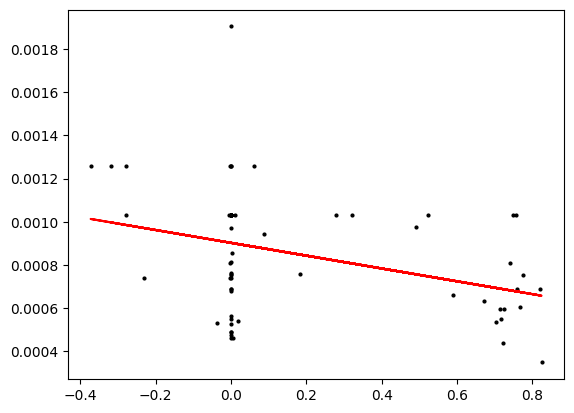

In [ ]:
X=np.array(df_lilly_emo.dropna()['v']).reshape(-1,1);
y=np.array(df_lilly_emo.dropna()['MA volatility']).reshape(-1,1);
reg=LinearRegression()
reg.fit(X,y)
plt.plot(df_lilly_emo['v'],df_lilly_emo['MA volatility'], 'ko',markersize=2);
plt.plot(X,reg.predict(X),'r-');
reg.score(X,y)

In [ ]:
X_pred=np.array(data_1min_filter.dropna()['MA v']).reshape(-1,1);
y_pred=reg.predict(X_pred);
df_predict['predicted volatility']=y_pred;
df_predict.head()

,timestamp_UTC,MA_sent_score,predicted return,predicted volatility
0,2022-11-10 13:32:00,0.048509,-0.000045,0.000863
1,2022-11-10 13:33:00,0.048509,-0.000045,0.000863
2,2022-11-10 13:34:00,0.048509,-0.000045,0.000863
3,2022-11-10 13:35:00,0.048509,-0.000045,0.000863
4,2022-11-10 13:36:00,0.048509,-0.000045,0.000863


In [ ]:
df_predict['randomized return']=df_predict['predicted return']+np.random.normal(0,df_predict['predicted volatility'])
predicted_price=np.array((data_1min_filter['open']+data_1min_filter['close'])/2);
for k in range(len(df_predict['randomized return'])-1):
  predicted_price[k+1]=predicted_price[k]*np.exp(df_predict.loc[k,'randomized return']);
df_predict['predicted price']=predicted_price

In [ ]:
!pip install brokenaxes
from brokenaxes import brokenaxes


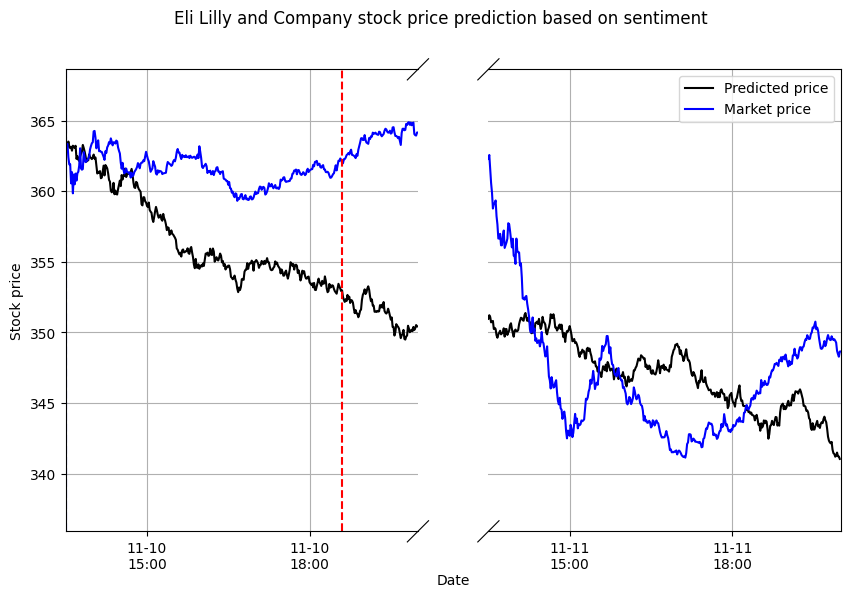

In [ ]:
fig = plt.figure(figsize=(10,6))
fig.suptitle('Eli Lilly and Company stock price prediction based on sentiment')
date_of_event = pd.to_datetime('2022-11-10 18:36')
bax = brokenaxes(xlims = (
            (
                pd.Timestamp('2022-11-10 13:30:00'),
                pd.Timestamp('2022-11-10 20:00:00'),
            ),
            (
                pd.Timestamp('2022-11-11 13:30:00'),
                pd.Timestamp('2022-11-11 20:00:00'),
            ),
        ),
        despine=False,
    )
bax.plot(df_predict['timestamp_UTC'],df_predict['predicted price'],color='k',label='Predicted price');
bax.plot(data_1min['timestamp_UTC'],data_1min['open'],color='blue',label='Market price')
bax.legend()
bax.axvline(date_of_event , color='red', linestyle='--')
bax.axvline(pd.to_datetime('2022-11-10 13:30'),color='blue',linestyle='--')
bax.grid();
bax.set_xlabel('Date',labelpad=30)
bax.set_ylabel('Stock price')
date_format = DateFormatter("%m-%d\n%H:%M")
for ax in bax.axs:
    ax.xaxis.set_major_formatter(date_format)

bax.last_row[0].set_xticks([
    pd.Timestamp('2022-11-10 15:00:00'),
    pd.Timestamp('2022-11-10 18:00:00'),
]);

bax.last_row[1].set_xticks([
    pd.Timestamp('2022-11-11 15:00:00'),
    pd.Timestamp('2022-11-11 18:00:00'),
]);

In [ ]:
df_predict.head()

,timestamp_UTC,MA_sent_score,predicted return,predicted price
0,2022-11-10 13:32:00,0.048509,-0.000045,363.139500
1,2022-11-10 13:33:00,0.048509,-0.000045,363.123168
2,2022-11-10 13:34:00,0.048509,-0.000045,363.106837
3,2022-11-10 13:35:00,0.048509,-0.000045,363.090507
4,2022-11-10 13:36:00,0.048509,-0.000045,363.074177


<ipython-input-55-a873214d7c6e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1min_filter['Normalized return']=(data_1min_filter['return']-np.mean(data_1min_filter['return']))/np.std(data_1min_filter['return']);


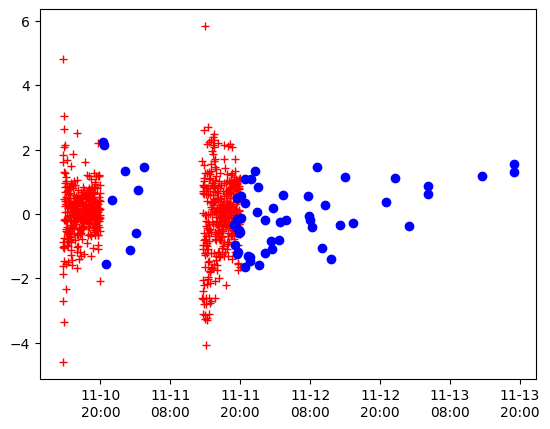

In [ ]:
data_1min_filter['Normalized return']=(data_1min_filter['return']-np.mean(data_1min_filter['return']))/np.std(data_1min_filter['return']);
df_lilly_emo['Normalized score']=(df_lilly['BERT sentiment score']-np.mean(df_lilly['BERT sentiment score']))/np.std(df_lilly['BERT sentiment score']);
plt.plot(data_1min_filter.loc[:,'timestamp_UTC'],data_1min_filter.loc[:,'Normalized return'],'r+',label='Return');
plt.plot(df_lilly.index,df_lilly.loc[:,'Normalized score'],'bo',label='Sentiment');
date_format = DateFormatter("%m-%d\n%H:%M")
plt.gca().xaxis.set_major_formatter(date_format)
plt.gca().xaxis.set_major_locator(HourLocator(interval=12))


In [ ]:
df_lilly_emo['date']=pd.to_datetime(df_lilly_emo['date'])

In [ ]:
df_lilly_emo['date']

0     2022-12-08 14:42:58
1     2022-12-05 17:58:35
2     2022-12-01 20:33:41
3     2022-11-30 18:53:33
4     2022-11-28 03:01:05
              ...        
99    2022-11-12 00:18:05
100   2022-11-13 04:13:37
101   2022-11-12 07:41:00
102   2022-11-12 01:21:12
103   2022-11-11 21:24:12
Name: date, Length: 104, dtype: datetime64[ns]

<ipython-input-18-f55b31b09f22>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1min_filter['Normalized return']=(data_1min_filter['return']-np.mean(data_1min_filter['return']))/np.std(data_1min_filter['return']);


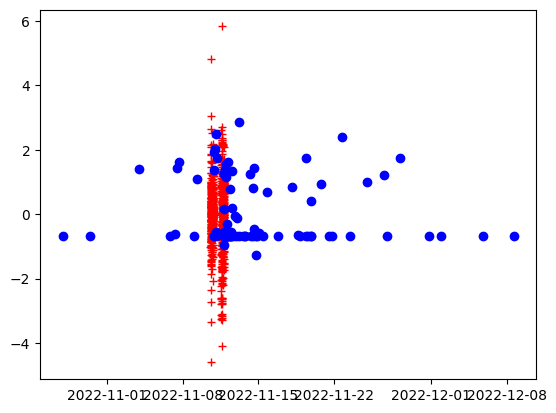

In [ ]:
data_1min_filter['Normalized return']=(data_1min_filter['return']-np.mean(data_1min_filter['return']))/np.std(data_1min_filter['return']);
df_lilly_emo['Normalized a']=(df_lilly_emo['a']-np.mean(df_lilly_emo['a']))/np.std(df_lilly_emo['a']);
plt.plot(data_1min_filter.loc[:,'timestamp_UTC'],data_1min_filter.loc[:,'Normalized return'],'r+',label='Return');
plt.plot(df_lilly_emo.loc[:,'date'],df_lilly_emo.loc[:,'Normalized a'],'bo',label='Arousal');

In [ ]:
data_1min.to_excel('/content/drive/MyDrive/Sociophysics/data_LLY_1min.xlsx')
data_daily.to_excel('/content/drive/MyDrive/Sociophysics/data_LLY_daily.xlsx')

In [ ]:
data_1min.sort_values(by=['timestamp'],inplace=True)
data_daily.sort_values(by=['timestamp'],inplace=True)
data_1min.reset_index(inplace=True)
data_daily.reset_index(inplace=True)

In [ ]:
data_1min.drop(columns=['index','Unnamed: 0'],inplace=True)
data_daily.drop(columns=['index','Unnamed: 0'],inplace=True)

In [ ]:
data_1min_filter['MA4_sent_score'].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: MA4_sent_score, dtype: float64

In [ ]:
plt.plot(data_1min['volume']);
id_ticks=[0,len(data_1min['timestamp'])-1];
id_labels=data_1min.loc[id_ticks,'timestamp'];
plt.xticks(ticks=id_ticks,labels=id_labels);
plt.title('Trading volume ');

In [ ]:
axs=plt.plot(data_1min_filter['timestamp_UTC'],(data_1min_filter['open']+data_1min_filter['close'])/2,'bo:',markersize=2);


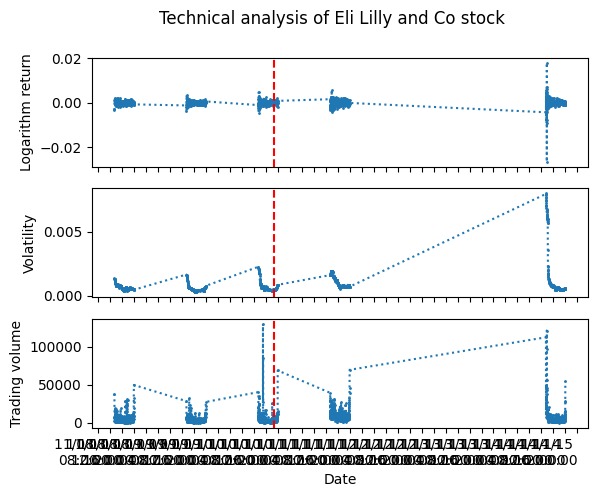

In [ ]:
fig,axs=plt.subplots(3,1,sharex=True);
axs[0].plot(data_1min_filter['timestamp_UTC'],data_1min_filter['return'],'o:',markersize=1);
axs[1].plot(data_1min_filter['timestamp_UTC'],data_1min_filter['volatility'],'o:',markersize=1);
axs[2].plot(data_1min_filter['timestamp_UTC'],data_1min_filter['volume'],'o:',markersize=1);
axs[0].set_ylabel('Logarithm return');
axs[1].set_ylabel('Volatility');
axs[2].set_ylabel('Trading volume');
axs[2].xaxis.set_major_locator(mdates.HourLocator(interval=4))
axs[2].xaxis.set_major_formatter(mdates.DateFormatter('%m/%d \n%H:%M'))
axs[0].axvline(x=pd.to_datetime('2022-11-10 18:36:00'),color='red',linestyle='--')
axs[1].axvline(x=pd.to_datetime('2022-11-10 18:36:00'),color='red',linestyle='--')
axs[2].axvline(x=pd.to_datetime('2022-11-10 18:36:00'),color='red',linestyle='--')
axs[2].set_xlabel('Date')

for label in axs[2].get_xticklabels(which='major'):
    label.set(rotation=0, horizontalalignment='right')
fig.suptitle('Technical analysis of Eli Lilly and Co stock');
plt.savefig('/content/drive/MyDrive/Sociophysics/stock_1.jpg')

In [ ]:
ax=plt.axes()
ax.plot(data_1min_filter['timestamp_UTC'],(data_1min_filter['open']+data_1min_filter['close'])/2,'o:',markersize=2);
ax.xaxis.set_major_locator(mdates.HourLocator(interval=4))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d \n %H:%M'))
ax.set_xlabel('Date')
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=0, horizontalalignment='right')
ax.set_title('Eli Lilly and Co stock price')
plt.axvline(x=pd.to_datetime('2022-11-10 18:36:00'),color='red',linestyle='--')
plt.savefig('/content/drive/MyDrive/Sociophysics/stock_2.jpg')

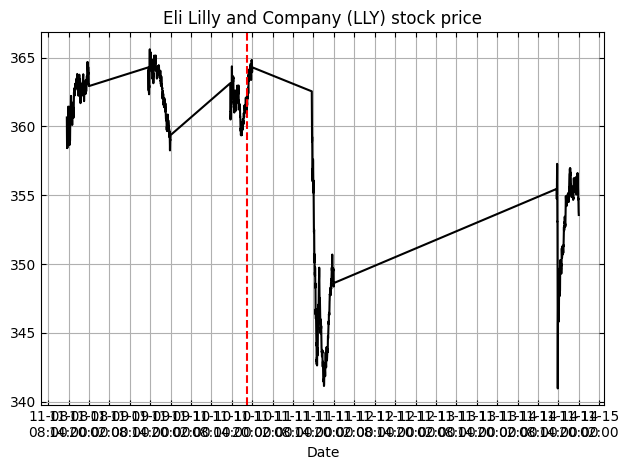

In [ ]:
from matplotlib.dates import DateFormatter, HourLocator

plt.plot(data_1min_filter['timestamp_UTC'], (data_1min_filter['open']+data_1min_filter['close'])/2, color='black' ,linestyle='-', markersize=2)

start_time = pd.Timestamp('2022-11-10 05:30:00')
end_time = pd.Timestamp('2022-11-10 21:00:00')

date_format = DateFormatter("%m-%d\n%H:%M")
plt.gca().xaxis.set_major_formatter(date_format)
plt.gca().xaxis.set_major_locator(HourLocator(interval=6))

plt.xlabel('Date')
plt.xlim()
plt.grid(True)

plt.tick_params(axis='both', direction='in',top=True, right=True)
plt.title('Eli Lilly and Company (LLY) stock price')

plt.axvline(pd.to_datetime('2022-11-10 18:36:00'),color='red',linestyle='--')

plt.tight_layout()
plt.show()